In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from keras.models import load_model

import cv2
import os
from tqdm import tqdm

import numpy as np
from numpy import asarray

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

import time

import random as rn

Using TensorFlow backend.


In [2]:
gendermodel = load_model('./trained_weights/gendermodel.h5')
agemodel = load_model('./trained_weights/agemodel.h5')
emotionmodel = load_model('./trained_weights/emotionmodel.h5')
ethnicitymodel = load_model('./trained_weights/ethnicitymodel.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [3]:
def gender_label(pred):
    if pred == [0]:
        return('Female')
    if pred == [1]:
        return('Male')
    
def age_label(pred):
    if pred == [0]:
        return('Age_20_30')
    if pred == [1]:
        return('Age_30_40')
    if pred == [2]:
        return('Age_40_50')
    if pred == [3]:
        return('Age_above_50')
    if pred == [4]:
        return('Age_below20')

def emotion_label(pred):
    if pred == [0]:
        return('Angry')
    if pred == [1]:
        return('Happy')
    if pred == [2]:
        return('Neutral')
    if pred == [3]:
        return('Sad')

def ethnicity_label(pred):
    if pred == [0]:
        return('Arab')
    if pred == [1]:
        return('Asian')
    if pred == [2]:
        return('Black')
    if pred == [3]:
        return('Hispanic')
    if pred == [4]:
        return('Indian')
    if pred == [5]:
        return('White')

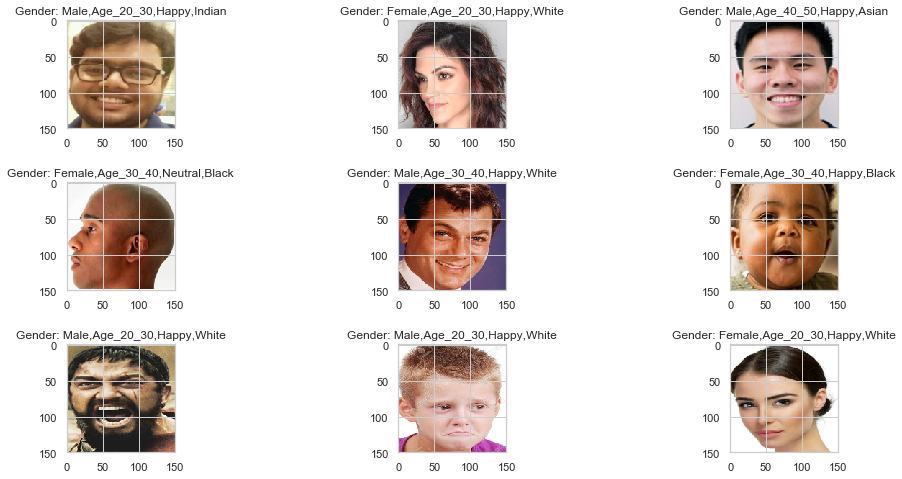

In [4]:
fig,ax=plt.subplots(3,3)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.5, wspace=0.2)
fig.set_size_inches(15,15)

images=[]
labels=[]

dir = 'dataset/test/'
for i in os.listdir(dir):
    img = cv2.imread(dir+i)
    img = cv2.resize(img, (150,150))
    X = np.array(img)
    X = np.expand_dims(X, axis=0)
    images.append(img)
    
    gender = gender_label(gendermodel.predict_classes(X))
    emotion = emotion_label(emotionmodel.predict_classes(X))
    age = age_label(agemodel.predict_classes(X))
    ethnicity = ethnicity_label(ethnicitymodel.predict_classes(X))

    labels.append(gender+','+age+','+emotion+','+ethnicity)

l=0
for i in range(3):
    for j in range(3):     
        ax[i,j].imshow(images[l][:,:,::-1])
        ax[i,j].set_title('Gender: '+str(labels[l]))
        ax[i,j].set_aspect('equal')
        l=l+1